# Importing Packages

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle

In [2]:
pwd

'/content'

# Loading the data

In [3]:
df = pd.read_csv(r'/content/makemytrip.csv',low_memory=False)
df.shape

(20000, 33)

In [4]:
df.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,...,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


In [5]:
data = df[['area','city','in_your_room','mmt_review_score','hotel_star_rating']]
data.head()

,area,city,in_your_room,mmt_review_score,hotel_star_rating
0,Hardasji Ki Magri,Udaipur,{{value}},4.5,1 star
1,Near Nai Gaon,Udaipur,{{value}},4.5,3 star
2,Near Bagore Ki Haveli,Udaipur,{{value}},NaN,2 star
3,Dabok,Udaipur,NaN,NaN,1 star
4,East Udaipur,Udaipur,{{value}},3.7,2 star


In [6]:
data['area'].interpolate(method='pad',inplace=True)
data['in_your_room'].interpolate(method='pad',inplace=True)
data = data.replace({'hotel_star_rating' : { '1 star' : 1, '2 star' : 2, '3 star' : 3, '4 star' : 4, '5 star' : 5, 'Three on 5' : 3,'Four on 5' : 4,'Five on 5': 5,'Four star': 4 }})

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [7]:
X = data['mmt_review_score']

In [8]:
x= X.values.reshape(-1,1)

In [9]:
x

array([[4.5],
       [4.5],
       [nan],
       ...,
       [4. ],
       [nan],
       [4.3]])

# Filling null values in target variable

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
imputer = imputer.fit(x)

In [13]:
data['mmt_review_score'] = imputer.transform(x) 

In [14]:
data.head()

,area,city,in_your_room,mmt_review_score,hotel_star_rating
0,Hardasji Ki Magri,Udaipur,{{value}},4.500000,1
1,Near Nai Gaon,Udaipur,{{value}},4.500000,3
2,Near Bagore Ki Haveli,Udaipur,{{value}},3.541425,2
3,Dabok,Udaipur,{{value}},3.541425,1
4,East Udaipur,Udaipur,{{value}},3.700000,2


,area,city,in_your_room,mmt_review_score,hotel_star_rating
0,Hardasji Ki Magri,Udaipur,{{value}},4.500000,1
1,Near Nai Gaon,Udaipur,{{value}},4.500000,3
2,Near Bagore Ki Haveli,Udaipur,{{value}},3.541425,2
3,Dabok,Udaipur,{{value}},3.541425,1
4,East Udaipur,Udaipur,{{value}},3.700000,2


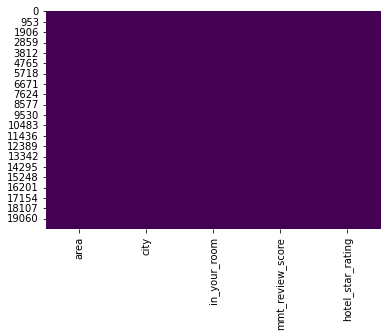

In [15]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
data['hotel_star_rating']=data['hotel_star_rating'].astype('int32') 
data.head()

In [16]:
data['in_your_room'].replace('{{value}}',np.nan, inplace=True)
data.isnull().sum()


area                    0
city                    0
in_your_room         4912
mmt_review_score        0
hotel_star_rating       0
dtype: int64

In [17]:
data['in_your_room']=data['in_your_room'].astype('str')       

In [18]:
def function(str):
     return len(str.split('|'))

In [19]:
data["count_in_your_room"]=data.apply(lambda x:function(x["in_your_room"]),axis=1)

In [20]:
data.drop(['in_your_room'], axis=1,inplace=True)
data.drop(['city'], axis=1,inplace=True)
data.head()

,area,mmt_review_score,hotel_star_rating,count_in_your_room
0,Hardasji Ki Magri,4.500000,1,1
1,Near Nai Gaon,4.500000,3,1
2,Near Bagore Ki Haveli,3.541425,2,1
3,Dabok,3.541425,1,1
4,East Udaipur,3.700000,2,1


In [21]:
City=pd.get_dummies(df['city'],drop_first=True,dummy_na=False)
df3=pd.DataFrame(City)
df3

,AbuRoad,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alibagh,Aligarh,...,West Sikkim,WestSikkim,Yamnotri,Yamunanagar,Yanam,Yavatmal,Yelagiri,Yercaud,Ziro,Zuluk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from pandas import DataFrame
df1=pd.DataFrame(data[['hotel_star_rating','count_in_your_room']])
df2=pd.DataFrame(data['mmt_review_score'])
#final_withcity = pd.concat([df1,df3, df2], axis=1)
final = pd.concat([df1,df2], axis=1)
final

,hotel_star_rating,count_in_your_room,mmt_review_score
0,1,1,4.500000
1,3,1,4.500000
2,2,1,3.541425
3,1,1,3.541425
4,2,1,3.700000
...,...,...,...
19995,1,5,3.541425
19996,1,5,2.900000
19997,3,19,4.000000
19998,1,6,3.541425


In [61]:
#final_withcity.corr()
data.corr()
data.columns

Index(['area', 'mmt_review_score', 'hotel_star_rating', 'count_in_your_room'], dtype='object')

# Outlier detection

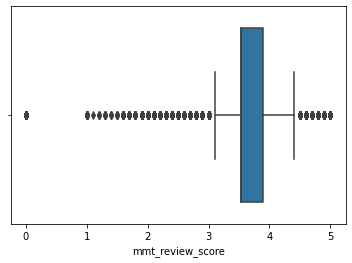

In [25]:
sns.boxplot(x=final['mmt_review_score'])

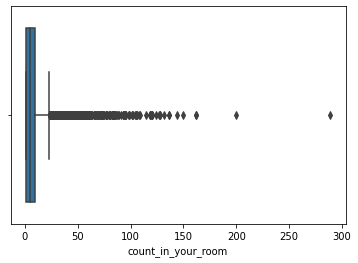

In [26]:
sns.boxplot(x=final['count_in_your_room'])

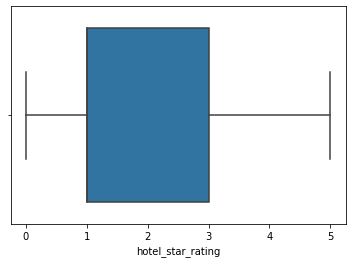

In [27]:
sns.boxplot(x=final['hotel_star_rating'])

In [28]:
Q1 = final.quantile(0.25)
Q3 = final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

hotel_star_rating     2.000000
count_in_your_room    9.000000
mmt_review_score      0.358575
dtype: float64


In [29]:
final.shape

(20000, 3)

In [62]:
x=final.iloc[:,0:2:]
x

,hotel_star_rating,count_in_your_room
0,1,1
1,3,1
2,2,1
3,1,1
4,2,1
...,...,...
19995,1,5
19996,1,5
19997,3,19
19998,1,6


In [63]:
y=final.iloc[:,2:3:]
y

,mmt_review_score
0,4.500000
1,4.500000
2,3.541425
3,3.541425
4,3.700000
...,...
19995,3.541425
19996,2.900000
19997,4.000000
19998,3.541425


In [64]:
y.shape

(20000, 1)

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=200)

In [67]:
x_train

,hotel_star_rating,count_in_your_room
5652,2,21
5605,1,10
8073,1,7
15296,3,3
11188,1,5
...,...,...
9036,3,8
14007,2,26
784,1,1
12905,3,8


In [68]:
#DecisionTreeRegModel = DecisionTreeRegressor(criterion='mse',random_state=100,max_depth=10,min_samples_leaf=15)
#DecisionTreeRegModel.fit(x_train,y_train)

In [69]:
#y_pred = DecisionTreeRegModel.predict(x_test)

In [70]:
#y_pred

# Random Forest Algorithm

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
regressor = RandomForestRegressor()

In [73]:
regressor.fit(x_train,y_train) 

<ipython-input-73-7657eeced357>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor()

In [74]:
y_pred = regressor.predict(x_test)

In [75]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5020893605155111
Mean Squared Error: 0.758559660862972
Root Mean Squared Error: 0.8709533057879578


In [76]:
max_features=['sqrt','log2']
min_samples_split=[3,5]
min_samples_leaf=[2,5]

In [77]:
param={'max_features':max_features,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [78]:
#rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param,n_iter=500,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [79]:
from sklearn.model_selection import RandomizedSearchCV
rfr=RandomForestRegressor(random_state=1)
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param,n_iter=500,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [80]:
rfr_random.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [3, 5]},
                   random_state=42, verbose=2)

In [81]:
print(rfr_random.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


# RMSE Score

In [82]:
mse= mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.8709533057879578

In [83]:
regressor.predict([[2,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.43954132])

# Loading onto pickle file

In [84]:
#from sklearn.externals import joblib 

In [86]:
#import joblib

In [87]:
#joblib.dump('regressor', open('a.pkl','wb')) 

In [88]:
#model = joblib.load(open('a.pkl','rb'))

In [90]:
pickle.dump(regressor, open('final.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('final.pkl','rb'))

In [91]:
print(model.predict([[2,3]]))

[3.43954132]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
